In [1]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
with open('./pickle/lapZeroBrownSpot.pickle', 'rb') as handle:
    lapZeroBrownSpot = pickle.load(handle)
    
with open('./pickle/lapZeroHealthy.pickle', 'rb') as handle:
    lapZeroHealthy = pickle.load(handle)
    
with open('./pickle/lapZeroHispa.pickle', 'rb') as handle:
    lapZeroHispa = pickle.load(handle)
    
with open('./pickle/lapZeroLeafBlast.pickle', 'rb') as handle:
    lapZeroLeafBlast = pickle.load(handle)

with open('./pickle/lapOneBrownSpot.pickle', 'rb') as handle:
    lapOneBrownSpot = pickle.load(handle)
    
with open('./pickle/lapOneHealthy.pickle', 'rb') as handle:
    lapOneHealthy = pickle.load(handle)
    
with open('./pickle/lapOneHispa.pickle', 'rb') as handle:
    lapOneHispa = pickle.load(handle)
    
with open('./pickle/lapOneLeafBlast.pickle', 'rb') as handle:
    lapOneLeafBlast = pickle.load(handle)
    
with open('./pickle/lapTwoBrownSpot.pickle', 'rb') as handle:
    lapTwoBrownSpot = pickle.load(handle)
    
with open('./pickle/lapTwoHealthy.pickle', 'rb') as handle:
    lapTwoHealthy = pickle.load(handle)
    
with open('./pickle/lapTwoHispa.pickle', 'rb') as handle:
    lapTwoHispa = pickle.load(handle)
    
with open('./pickle/lapTwoLeafBlast.pickle', 'rb') as handle:
    lapTwoLeafBlast = pickle.load(handle)
    
with open('./pickle/areaBrownSpot.pickle', 'rb') as handle:
    areaBrownSpot = pickle.load(handle)
    
with open('./pickle/areaHealthy.pickle', 'rb') as handle:
    areaHealthy = pickle.load(handle)
    
with open('./pickle/areaHispa.pickle', 'rb') as handle:
    areaHispa = pickle.load(handle)
    
with open('./pickle/areaLeafBlast.pickle', 'rb') as handle:
    areaLeafBlast = pickle.load(handle)
    
with open('./pickle/perimeterBrownSpot.pickle', 'rb') as handle:
    perimeterBrownSpot = pickle.load(handle)
    
with open('./pickle/perimeterHealthy.pickle', 'rb') as handle:
    perimeterHealthy = pickle.load(handle)
    
with open('./pickle/perimeterHispa.pickle', 'rb') as handle:
    perimeterHispa = pickle.load(handle)
    
with open('./pickle/perimeterLeafBlast.pickle', 'rb') as handle:
    perimeterLeafBlast = pickle.load(handle)

In [4]:
features = []

target = []

for i in range(523):
    features.append([lapZeroBrownSpot[i], lapOneBrownSpot[i], lapTwoBrownSpot[i], areaBrownSpot[i], perimeterBrownSpot[i]])
    target.append('BrownSpot')
    features.append([lapZeroHealthy[i], lapOneHealthy[i], lapTwoHealthy[i], areaHealthy[i], perimeterHealthy[i]])
    target.append('Healthy')
    features.append([lapZeroHispa[i], lapOneHispa[i], lapTwoHispa[i], areaHispa[i], perimeterHispa[i]])
    target.append('Hispa')
    features.append([lapZeroLeafBlast[i], lapOneLeafBlast[i], lapTwoLeafBlast[i], areaLeafBlast[i], perimeterLeafBlast[i]])
    target.append('LeafBlast')

In [6]:
features = np.array(features)

dataframe = pd.DataFrame({
    'laplacian zero':features[:,0],
    'laplacian one':features[:,1],
    'laplacian two':features[:,2],
    'area':features[:,3],
    'perimeter':features[:, 4],
    'class':target[:]
})

In [18]:
# normalize the dataset
features = dataframe.drop('class', axis=1)
columnsName = features.columns
columnsName = columnsName.tolist()
scaler = MinMaxScaler()
dataframe[columnsName] = scaler.fit_transform(dataframe[columnsName])

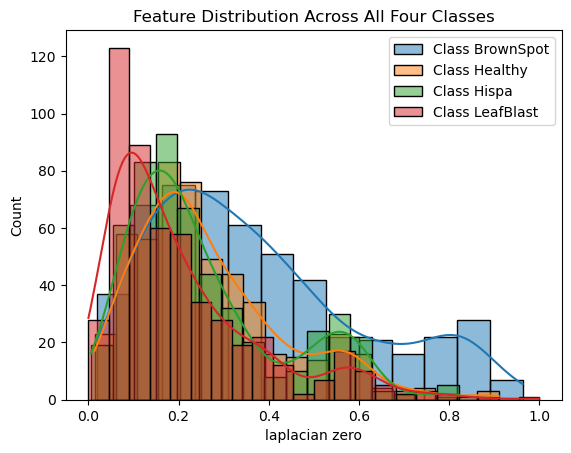

In [19]:
for classLabel in dataframe['class'].unique():
    sns.histplot(dataframe[dataframe['class'] == classLabel]['laplacian zero'], kde=True, label=f'Class {classLabel}')

plt.title('Feature Distribution Across All Four Classes')
plt.legend()
plt.show()

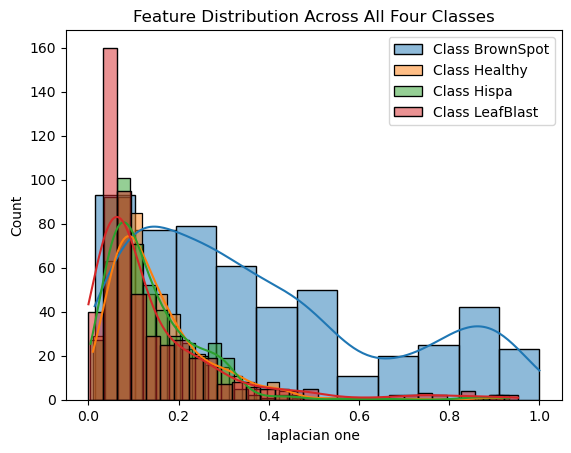

In [20]:
for classLabel in dataframe['class'].unique():
    sns.histplot(dataframe[dataframe['class'] == classLabel]['laplacian one'], kde=True, label=f'Class {classLabel}')

plt.title('Feature Distribution Across All Four Classes')
plt.legend()
plt.show()

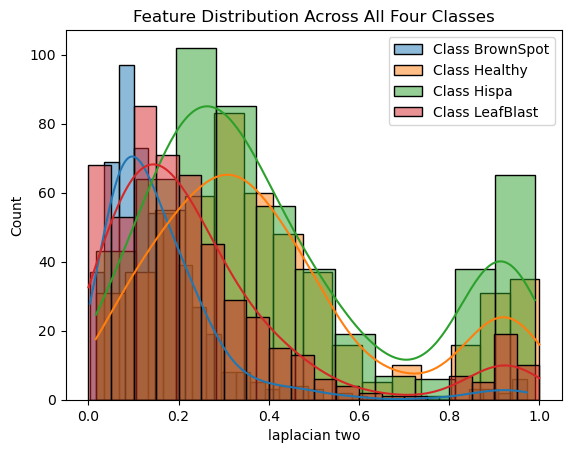

In [21]:
for classLabel in dataframe['class'].unique():
    sns.histplot(dataframe[dataframe['class'] == classLabel]['laplacian two'], kde=True, label=f'Class {classLabel}')

plt.title('Feature Distribution Across All Four Classes')
plt.legend()
plt.show()

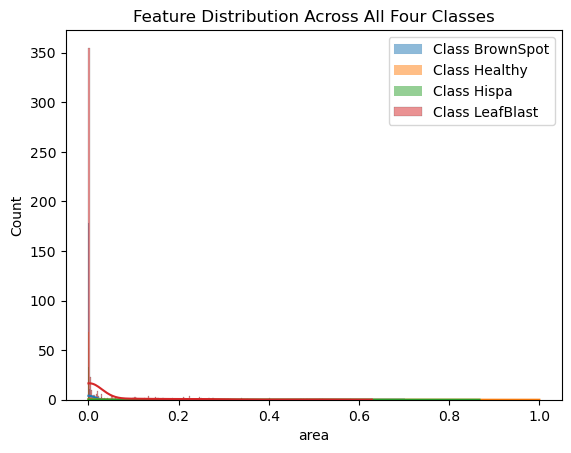

In [22]:
for classLabel in dataframe['class'].unique():
    sns.histplot(dataframe[dataframe['class'] == classLabel]['area'], kde=True, label=f'Class {classLabel}')

plt.title('Feature Distribution Across All Four Classes')
plt.legend()
plt.show()

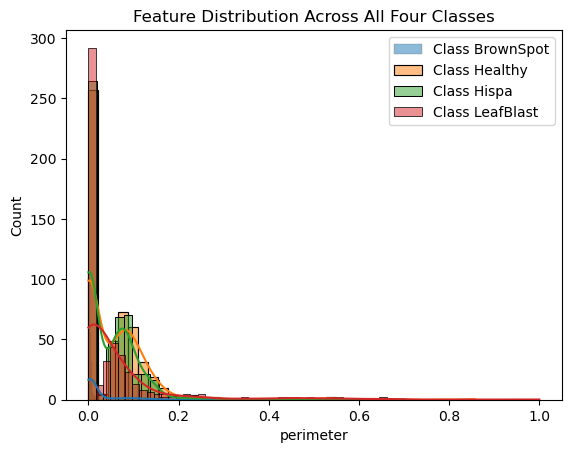

In [23]:
for classLabel in dataframe['class'].unique():
    sns.histplot(dataframe[dataframe['class'] == classLabel]['perimeter'], kde=True, label=f'Class {classLabel}')

plt.title('Feature Distribution Across All Four Classes')
plt.legend()
plt.show()

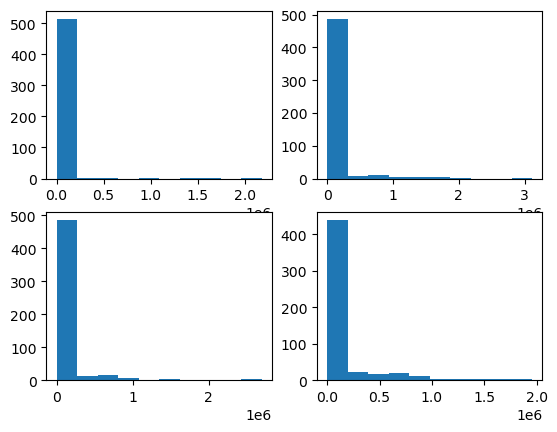

In [28]:
plt.subplot(2, 2, 1)
plt.hist(areaBrownSpot, bins=10)
plt.subplot(2, 2, 2)
plt.hist(areaHealthy, bins=10)
plt.subplot(2, 2, 3)
plt.hist(areaHispa, bins=10)
plt.subplot(2, 2, 4)
plt.hist(areaLeafBlast, bins=10)
plt.show()

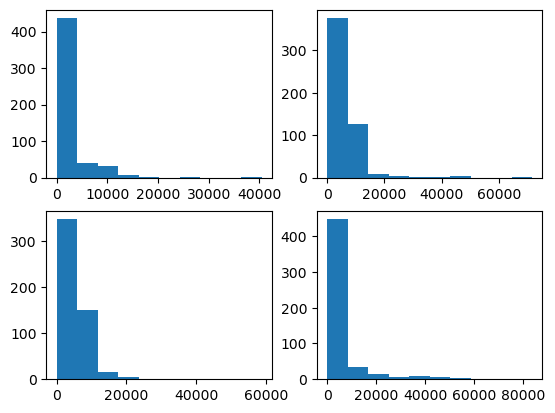

In [29]:
plt.subplot(2, 2, 1)
plt.hist(perimeterBrownSpot, bins=10)
plt.subplot(2, 2, 2)
plt.hist(perimeterHealthy, bins=10)
plt.subplot(2, 2, 3)
plt.hist(perimeterHispa, bins=10)
plt.subplot(2, 2, 4)
plt.hist(perimeterLeafBlast, bins=10)
plt.show()